# Opinion Dynamics

In [1]:
!which python

/Users/caput/sna-project/bookdealer-recommendation-network/.venv/bin/python


In [2]:
!python --version

Python 3.8.2


In [3]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import networkx as nx

## Network generation: using books in common as link between booksellers

In [4]:
df = pd.read_csv('data/bd-recommendations.csv')

In [5]:
df['consigliato-da']

0        81/libreria-tasso, 60/a-tutto-libro, 55/libris...
1        39/la-confraternita-delluva-libreria-indipende...
2        168/magia-del-fumetto, 486/lotta-libreria, 306...
3        51/il-ponte-sulla-dora, 116/lettera22, 433/lib...
4        285/libreria-fogola-pisa, 512/libreria-di-donn...
                               ...                        
20621                                41/libreria-zabarella
20622                                41/libreria-zabarella
20623                                41/libreria-zabarella
20624                                41/libreria-zabarella
20625    39/la-confraternita-delluva-libreria-indipendente
Name: consigliato-da, Length: 20626, dtype: object

In [6]:
# Convert str to list
df['consigliato-da'] = [str(bookdealer).split(', ') for bookdealer in df['consigliato-da']]
# Get bookdealer ids
recommendations = [recommendation for recommendations in df['consigliato-da'] for recommendation in recommendations]
bookdealers = list(set(recommendations))

In [7]:
books = list(df['consigliato-da'])
shared_books = list()

for bookstores in books:
    if len(bookstores) > 1:
        shared_books += list(itertools.combinations(bookstores, 2))

In [8]:
len(shared_books)

44783

In [9]:
edges = list()

for shared_book in list(set(shared_books)):
    bookdealer1 = bookdealers.index(shared_book[0])
    bookdealer2 = bookdealers.index(shared_book[1])
    weight = shared_books.count(shared_book)
    edges.append((bookdealer1, bookdealer2, weight))

In [10]:
edge_list = pd.DataFrame(columns=['Source', 'Target', 'Weight'], data=edges)

In [11]:
G = nx.from_pandas_edgelist(edge_list[edge_list['Weight']>1], 'Source', 'Target', ['Weight'])

In [12]:
edge_list.to_csv('data/booksellers-edge.csv')

## Network analysis

In [13]:
nx.info(G)

'Graph with 417 nodes and 7066 edges'

In [14]:
nx.is_connected(G)

True

In [15]:
nx.density(G)

0.08146559675336654

In [16]:
edge_list['Weight'].describe()

count    22984.000000
mean         1.948442
std          2.514769
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         88.000000
Name: Weight, dtype: float64

In [17]:
average_degree = 2*G.number_of_edges() / float(G.number_of_nodes())
print(average_degree)

33.88968824940048


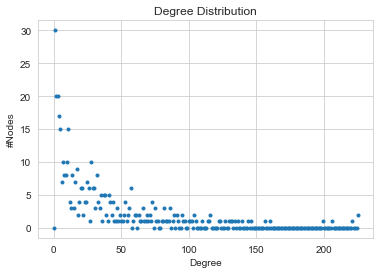

In [18]:
hist = nx.degree_histogram(G)
    
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
#plt.loglog()
plt.show()

In [19]:
nx.diameter(G)

4

In [20]:
nx.average_clustering(G)

0.6242282222770639

## Opinion Dynamics: Discrete Opinion models

In [21]:
import ndlib
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.opinions as op

In [22]:
complete = nx.complete_graph(G.number_of_nodes())

### Voter Model

In [44]:
model = op.VoterModel(G)
config = mc.Configuration()
config.add_model_parameter('fraction_infected', 0.5)
model.set_initial_status(config)

iterations = model.iteration_bunch(1000000)
trends = model.build_trends(iterations)

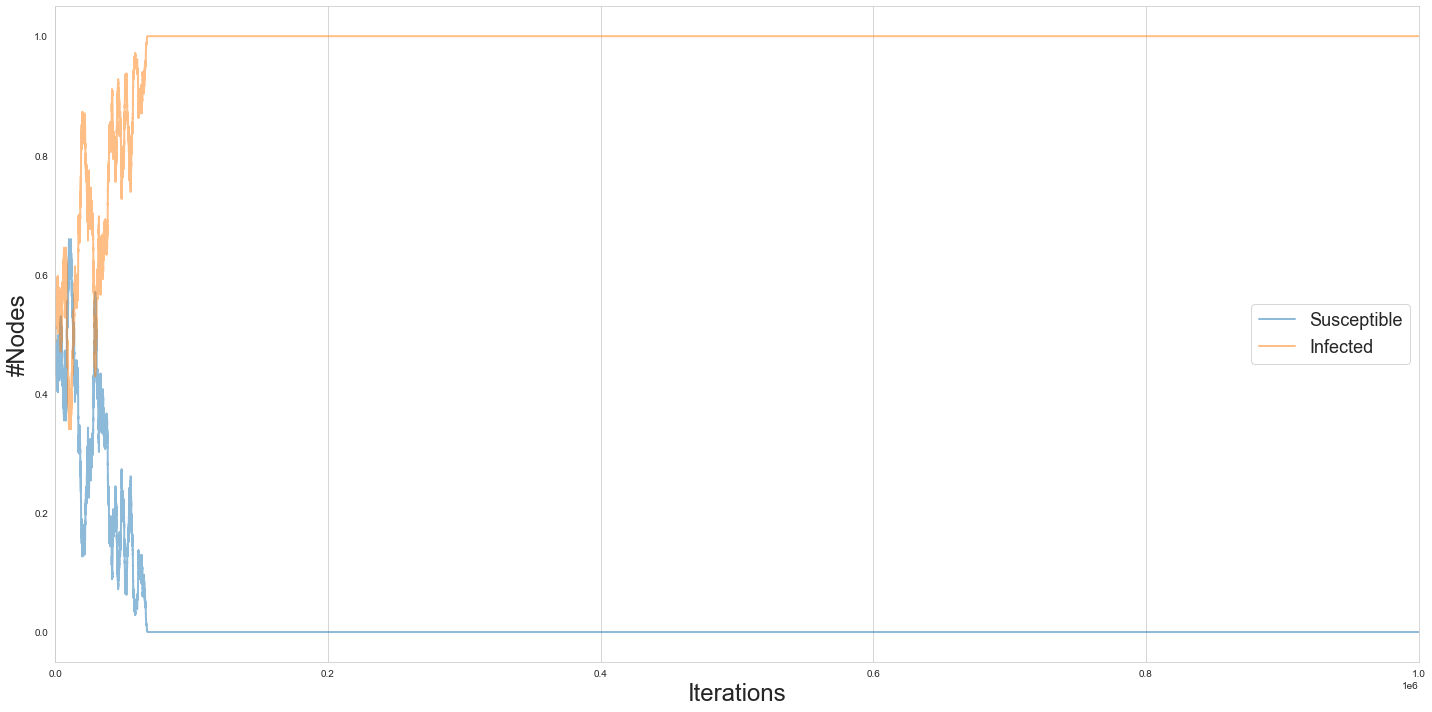

In [45]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

In [25]:
model = op.VoterModel(complete)
config = mc.Configuration()
config.add_model_parameter('fraction_infected', 0.5)
model.set_initial_status(config)

iterations = model.iteration_bunch(1000)
trends = model.build_trends(iterations)

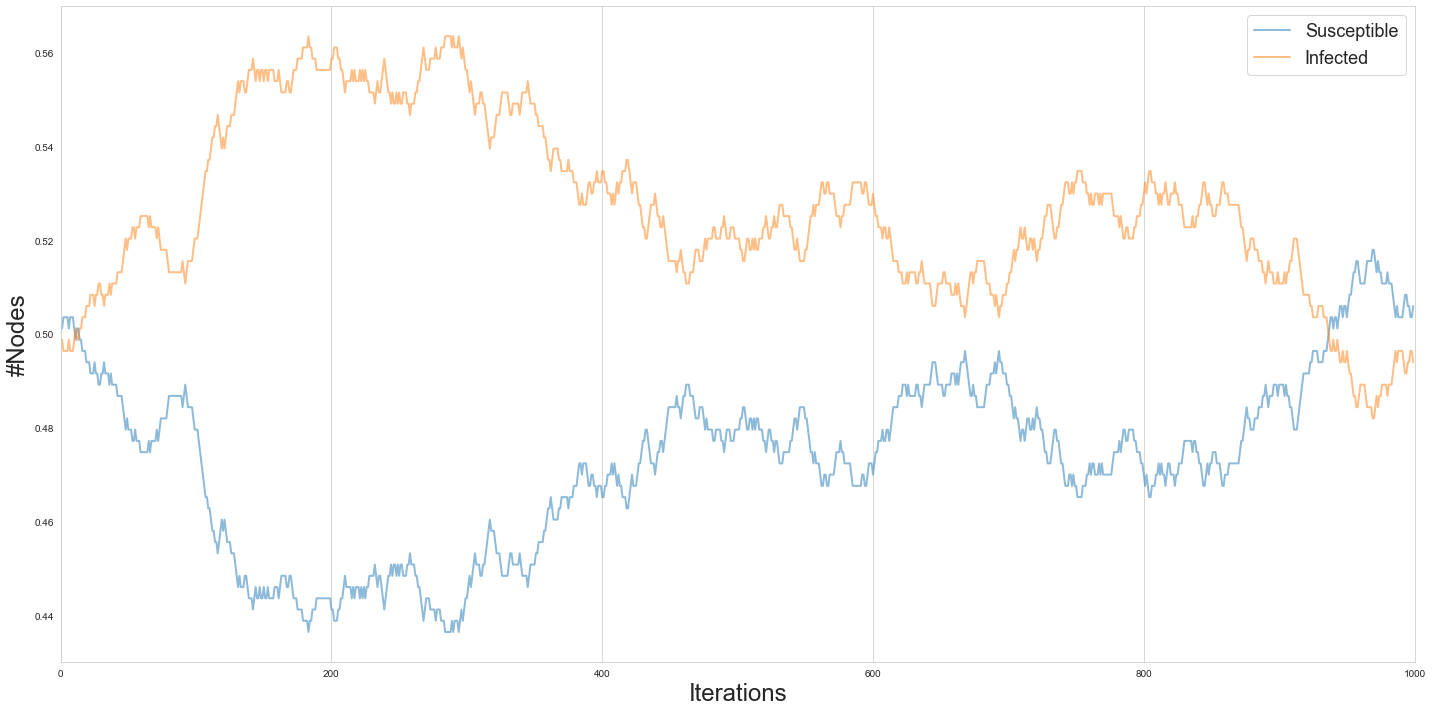

In [26]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

### Majority Rule

In [46]:
model = op.MajorityRuleModel(G)
config = mc.Configuration()
config.add_model_parameter('q', 5)
config.add_model_parameter('fraction_infected', 0.5)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(1000000)
trends = model.build_trends(iterations)

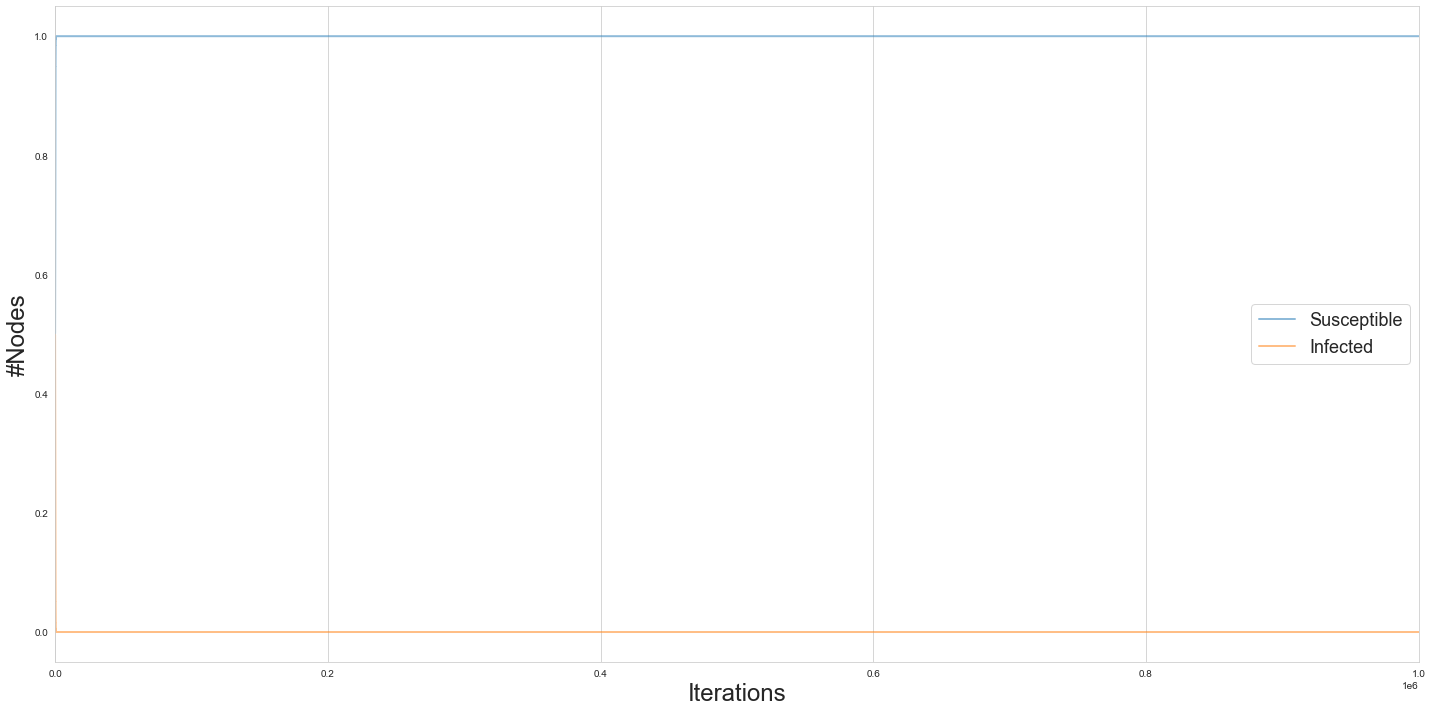

In [47]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

In [29]:
model = op.MajorityRuleModel(complete)
config = mc.Configuration()
config.add_model_parameter('q', 5)
config.add_model_parameter('fraction_infected', 0.5)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(200)
trends = model.build_trends(iterations)

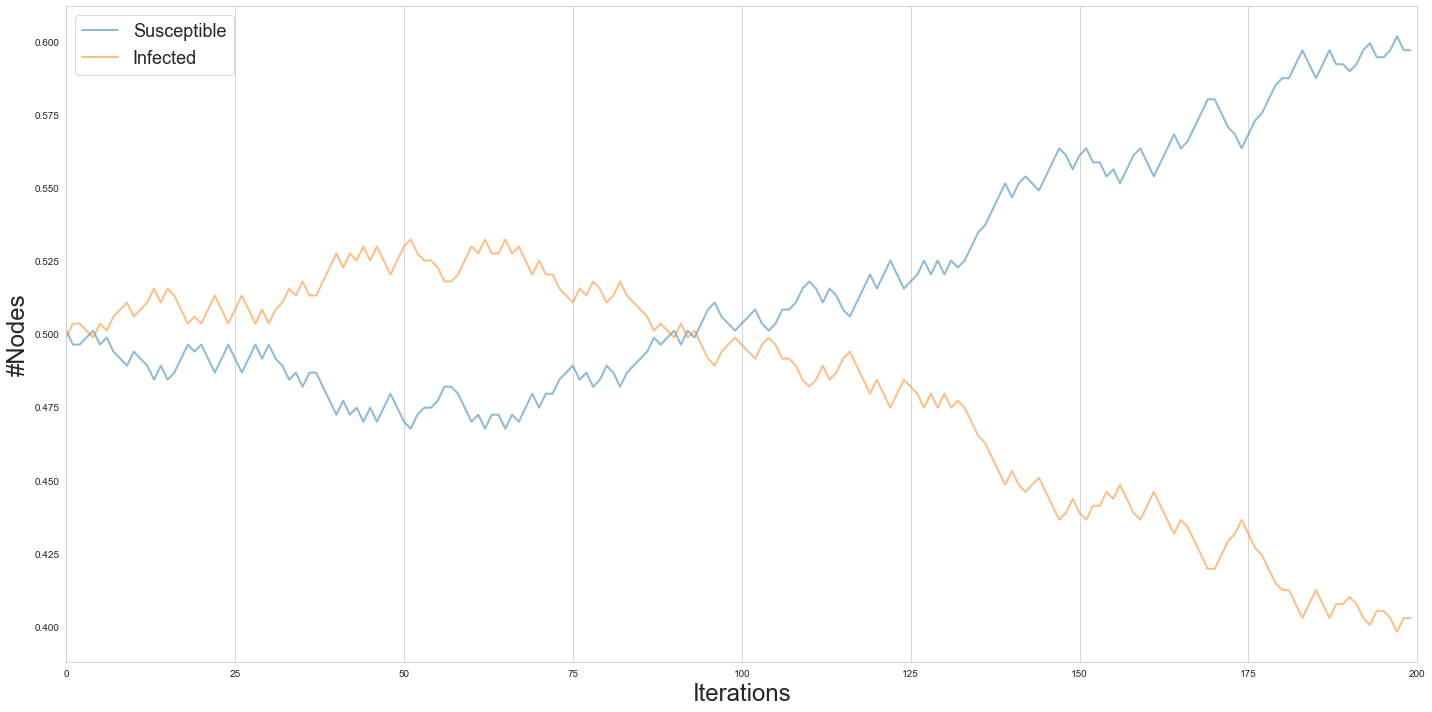

In [30]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

### Sznajd

In [31]:
model = op.SznajdModel(G)
config = mc.Configuration()
config.add_model_parameter('fraction_infected', 0.7)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(10)
trends = model.build_trends(iterations)

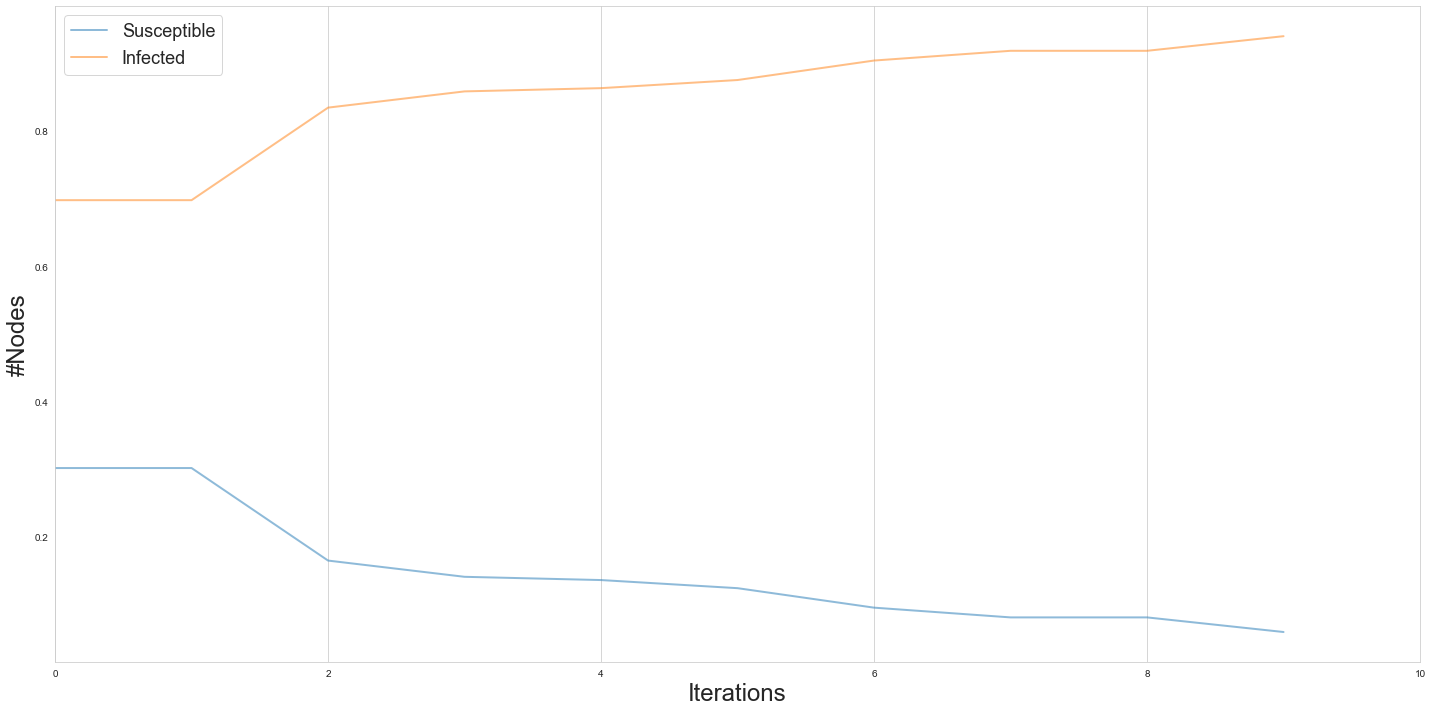

In [32]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

In [33]:
model = op.SznajdModel(complete)
config = mc.Configuration()
config.add_model_parameter('fraction_infected', 0.7)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(10)
trends = model.build_trends(iterations)

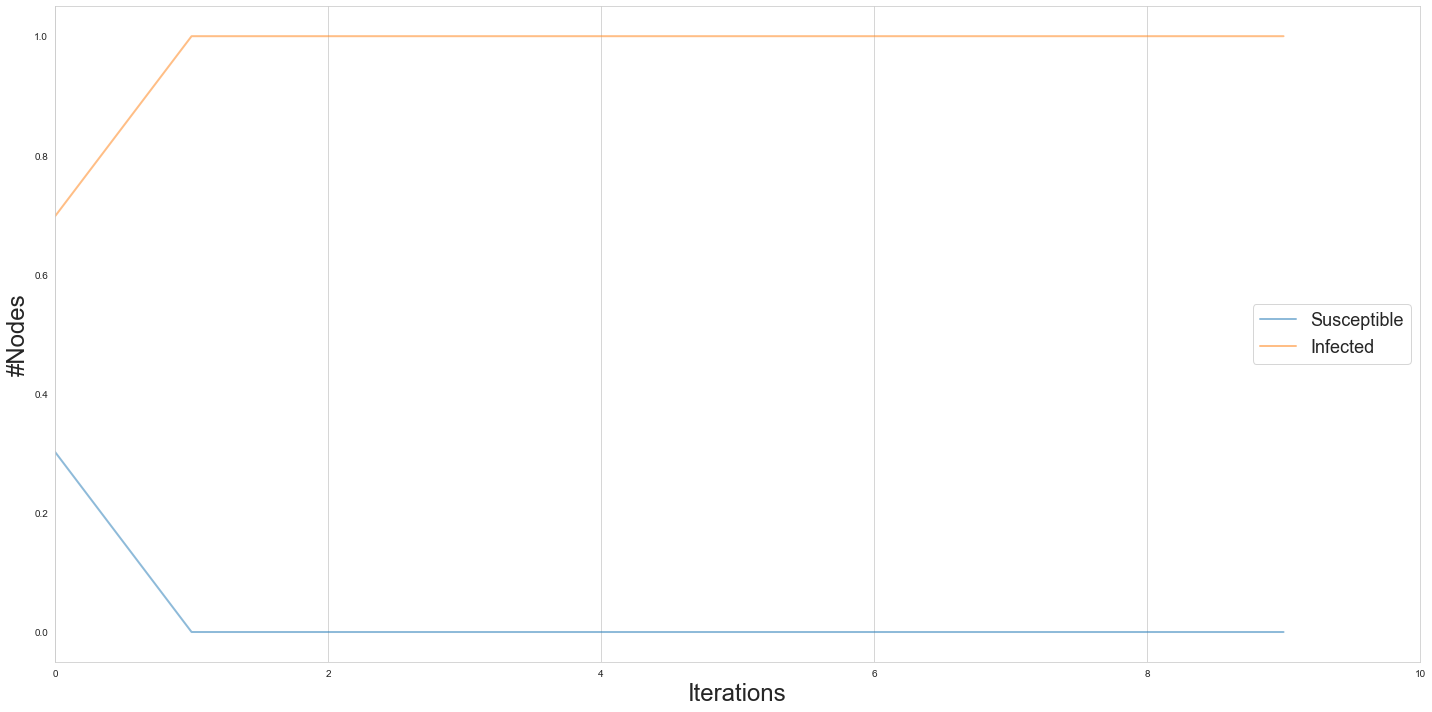

In [34]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

### Q-Voter

In [35]:
model = op.QVoterModel(G)
config = mc.Configuration()
config.add_model_parameter("q", 5)
config.add_model_parameter('fraction_infected', 0.3)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(600)
trends = model.build_trends(iterations)

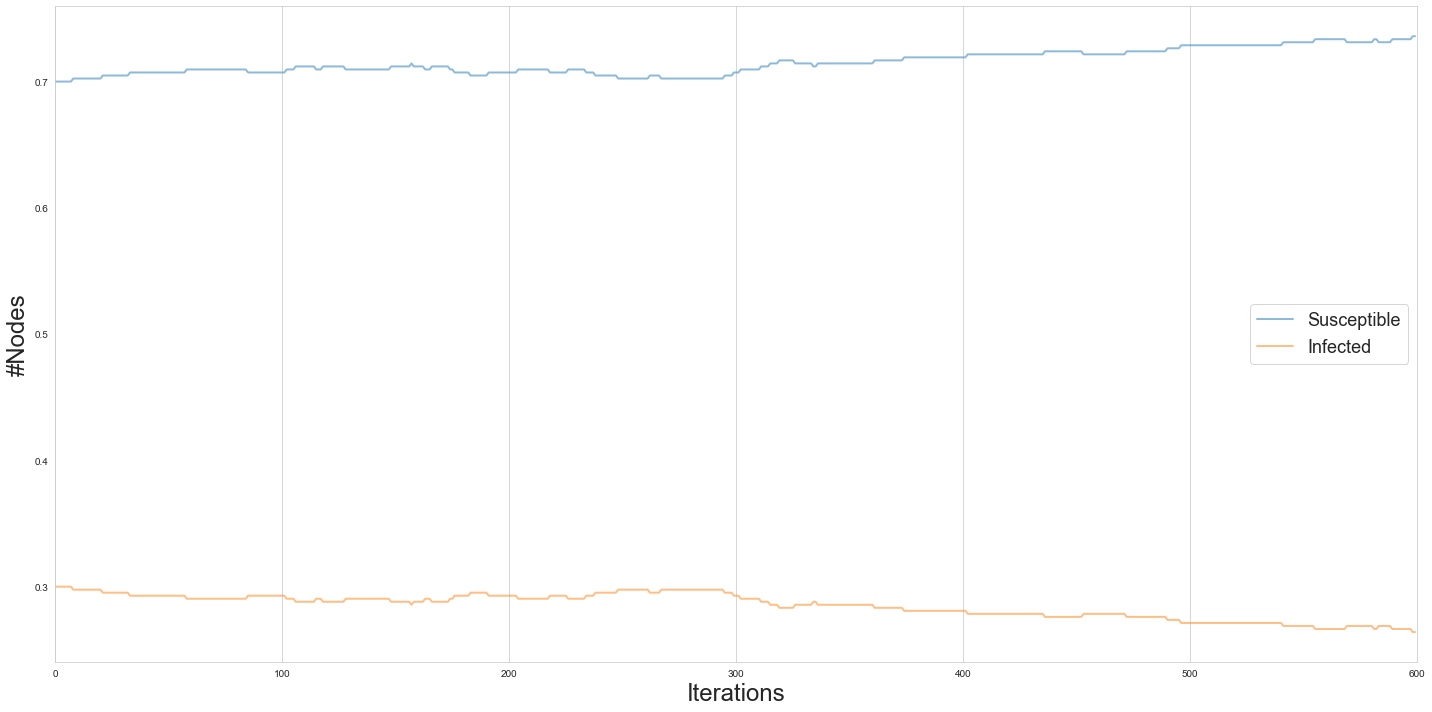

In [36]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

In [37]:
model = op.QVoterModel(complete)
config = mc.Configuration()
config.add_model_parameter("q", 5)
config.add_model_parameter('fraction_infected', 0.3)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(600)
trends = model.build_trends(iterations)

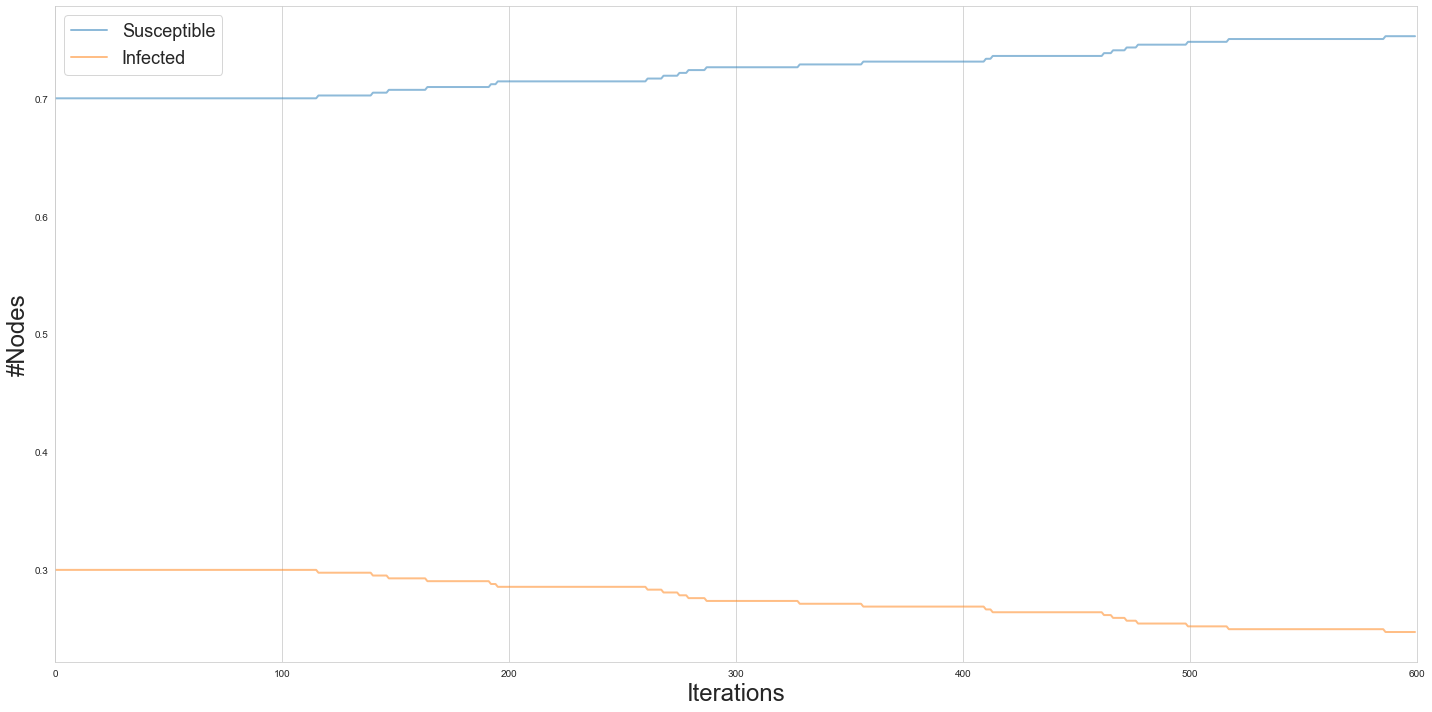

In [38]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

## Continuos Opinion models

### Deffuant

In [39]:
model = op.AlgorithmicBiasModel(G)

# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 0.32)
config.add_model_parameter("gamma", 0)  # No bias = Deffuant
model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(100)

IndexError: index 459 is out of bounds for axis 0 with size 417

In [ ]:
from ndlib.viz.mpl.OpinionEvolution import OpinionEvolution
viz = OpinionEvolution(model, iterations)
viz.plot()